In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 一、数据导入

In [2]:
# 文件列表
files_info = [
    {'name': 'Tianjin_Balitai_esf_data.xlsx', 'block': 'Balitai', 'type': 'esf'},
    {'name': 'Tianjin_Balitai_zu_data.xlsx', 'block': 'Balitai', 'type': 'zu'},
    {'name': 'Tianjin_Quanyechang_esf_data.xlsx', 'block': 'Quanyechang', 'type': 'esf'},
    {'name': 'Tianjin_Quanyechang_zu_data.xlsx', 'block': 'Quanyechang', 'type': 'zu'},
    {'name': 'Tianjin_Wuqing_esf_data.xlsx', 'block': 'Wuqing', 'type': 'esf'},
    {'name': 'Tianjin_Wuqing_zu_data.xlsx', 'block': 'Wuqing', 'type': 'zu'},
    {'name': 'Tianjin_Zhongxin_esf_data.xlsx', 'block': 'Zhongxin', 'type': 'esf'},
    {'name': 'Tianjin_Zhongxin_zu_data.xlsx', 'block': 'Zhongxin', 'type': 'zu'}
]

In [3]:
esf_data_frames = []  # 二手房数据
zu_data_frames = []   # 租房数据

# 导入所有数据文件并分别存储
for file_info in files_info:
    try:
        # 读取Excel文件
        df = pd.read_excel(file_info['name'])
        
        # 添加区块列
        df['block'] = file_info['block']
        
        # 根据类型分别存储
        if file_info['type'] == 'esf':
            esf_data_frames.append(df)
            print(f"成功导入二手房数据: {file_info['name']} - 形状: {df.shape}")
        else: 
            zu_data_frames.append(df)
            print(f"成功导入租房数据: {file_info['name']} - 形状: {df.shape}")
        
    except Exception as e:
        print(f"导入失败: {file_info['name']} - 错误: {e}")

成功导入二手房数据: Tianjin_Balitai_esf_data.xlsx - 形状: (1200, 4)
成功导入租房数据: Tianjin_Balitai_zu_data.xlsx - 形状: (614, 3)
成功导入二手房数据: Tianjin_Quanyechang_esf_data.xlsx - 形状: (1200, 4)
成功导入租房数据: Tianjin_Quanyechang_zu_data.xlsx - 形状: (1167, 3)
成功导入二手房数据: Tianjin_Wuqing_esf_data.xlsx - 形状: (1200, 4)
成功导入租房数据: Tianjin_Wuqing_zu_data.xlsx - 形状: (1200, 3)
成功导入二手房数据: Tianjin_Zhongxin_esf_data.xlsx - 形状: (1200, 4)
成功导入租房数据: Tianjin_Zhongxin_zu_data.xlsx - 形状: (1200, 3)


In [4]:
# 合并二手房数据
if esf_data_frames:
    esf_combined_df = pd.concat(esf_data_frames, ignore_index=True)
    print(f"二手房数据合并后形状: {esf_combined_df.shape}")
    print(f"二手房区块分布:")
    print(esf_combined_df['block'].value_counts())
    print(f"二手房数据列: {esf_combined_df.columns.tolist()}")
else:
    print("没有成功导入任何二手房数据文件")
    esf_combined_df = pd.DataFrame()

二手房数据合并后形状: (4800, 4)
二手房区块分布:
block
Balitai        1200
Quanyechang    1200
Wuqing         1200
Zhongxin       1200
Name: count, dtype: int64
二手房数据列: ['面积(㎡)', '总价(万)', '单价(元/㎡)', 'block']


In [5]:
# 合并租房数据
if zu_data_frames:
    zu_combined_df = pd.concat(zu_data_frames, ignore_index=True)
    print(f"租房数据合并后形状: {zu_combined_df.shape}")
    print(f"租房区块分布:")
    print(zu_combined_df['block'].value_counts())
    print(f"租房数据列: {zu_combined_df.columns.tolist()}")
else:
    print("没有成功导入任何租房数据文件")
    zu_combined_df = pd.DataFrame()

租房数据合并后形状: (4181, 3)
租房区块分布:
block
Zhongxin       1200
Wuqing         1200
Quanyechang    1167
Balitai         614
Name: count, dtype: int64
租房数据列: ['面积(㎡)', '租金(元/月)', 'block']


In [6]:
esf_combined_df.head()

,面积(㎡),总价(万),单价(元/㎡),block
0,145.67,430.0,29518,Balitai
1,57.15,119.0,20822,Balitai
2,50.42,130.0,25783,Balitai
3,141.61,515.0,36367,Balitai
4,103.66,406.0,39166,Balitai


In [7]:
zu_combined_df.head()

,面积(㎡),租金(元/月),block
0,400,29000,Balitai
1,80,3600,Balitai
2,49,1700,Balitai
3,380,30000,Balitai
4,38,2000,Balitai


# 二、数据预处理

## 1、空值检查

In [8]:
# 空值检查函数
def simple_check_missing(df, df_name):
    print(f"{df_name}空值检查:")
    print("列名\t\t空值数量")
    print("-" * 30)
    
    for col in df.columns:
        missing_count = df[col].isnull().sum()
        print(f"{col}\t\t{missing_count}")

In [9]:
simple_check_missing(esf_combined_df, "二手房数据")

二手房数据空值检查:
列名		空值数量
------------------------------
面积(㎡)		0
总价(万)		0
单价(元/㎡)		0
block		0


In [10]:
simple_check_missing(zu_combined_df, "租房数据")

租房数据空值检查:
列名		空值数量
------------------------------
面积(㎡)		0
租金(元/月)		0
block		0


## 2、描述性统计

In [11]:
print("二手房数据描述性统计:")
print(esf_combined_df.describe())

二手房数据描述性统计:
             面积(㎡)        总价(万)        单价(元/㎡)
count  4800.000000  4800.000000    4800.000000
mean    104.900298   245.870313   26875.315625
std      56.281000   241.200861   20556.231393
min       9.220000    33.000000    3633.000000
25%      73.427500   110.000000   11963.250000
50%      99.000000   169.000000   19777.500000
75%     129.000000   290.000000   36443.500000
max     595.120000  2550.000000  170731.000000


In [12]:
print("租房数据描述性统计:")
print(zu_combined_df.describe())

租房数据描述性统计:
             面积(㎡)       租金(元/月)
count  4181.000000   4181.000000
mean     89.062425   2983.596747
std      50.839194   3321.277515
min       7.000000    300.000000
25%      58.000000   1550.000000
50%      87.000000   2300.000000
75%     106.000000   3000.000000
max     469.000000  40000.000000


## 3、离群值检查（整体）

In [13]:
# 离群值检查函数
def simple_sigma_check(df, df_name):
    print(f"{df_name}离群值检查:")

    for col in df.select_dtypes(include=[np.number]).columns:
        mean = df[col].mean()
        std = df[col].std()
        lower = mean - 3 * std
        upper = mean + 3 * std
        
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        col_outliers = len(outliers)
        
        print(f"{col}: {col_outliers} 个离群值")

In [14]:
simple_sigma_check(esf_combined_df, "二手房数据")

二手房数据离群值检查:
面积(㎡): 89 个离群值
总价(万): 126 个离群值
单价(元/㎡): 77 个离群值


In [15]:
simple_sigma_check(zu_combined_df, "租房数据")

租房数据离群值检查:
面积(㎡): 88 个离群值
租金(元/月): 89 个离群值


## 4、计算每平方米租金

In [16]:
zu_combined_df['单价(元/㎡)'] = zu_combined_df['租金(元/月)'] / zu_combined_df['面积(㎡)']
zu_combined_df.head()

,面积(㎡),租金(元/月),block,单价(元/㎡)
0,400,29000,Balitai,72.500000
1,80,3600,Balitai,45.000000
2,49,1700,Balitai,34.693878
3,380,30000,Balitai,78.947368
4,38,2000,Balitai,52.631579


## 5、离群值检查（按Blcok）

In [17]:
# 按block检查离群值函数
def block_sigma_check(df, df_name):
    # 获取数值列
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    for block in df['block'].unique():
        print(f"\n{block} 区:")
        block_data = df[df['block'] == block]

        for col in numeric_cols:
            mean = block_data[col].mean()
            std = block_data[col].std()
            lower = mean - 3 * std
            upper = mean + 3 * std
            
            outliers = block_data[(block_data[col] < lower) | (block_data[col] > upper)]
            col_outliers = len(outliers)
            
            print(f"  {col}: {col_outliers} 个离群值")

In [18]:
# 检查二手房数据各区块离群值
block_sigma_check(esf_combined_df, "二手房数据")


Balitai 区:
  面积(㎡): 7 个离群值
  总价(万): 30 个离群值
  单价(元/㎡): 35 个离群值

Quanyechang 区:
  面积(㎡): 34 个离群值
  总价(万): 27 个离群值
  单价(元/㎡): 13 个离群值

Wuqing 区:
  面积(㎡): 21 个离群值
  总价(万): 23 个离群值
  单价(元/㎡): 14 个离群值

Zhongxin 区:
  面积(㎡): 38 个离群值
  总价(万): 22 个离群值
  单价(元/㎡): 7 个离群值


In [19]:
# 检查租房数据各区块离群值
block_sigma_check(zu_combined_df, "租房数据")


Balitai 区:
  面积(㎡): 18 个离群值
  租金(元/月): 20 个离群值
  单价(元/㎡): 14 个离群值

Quanyechang 区:
  面积(㎡): 30 个离群值
  租金(元/月): 28 个离群值
  单价(元/㎡): 22 个离群值

Wuqing 区:
  面积(㎡): 27 个离群值
  租金(元/月): 28 个离群值
  单价(元/㎡): 10 个离群值

Zhongxin 区:
  面积(㎡): 11 个离群值
  租金(元/月): 16 个离群值
  单价(元/㎡): 12 个离群值


## 6、计算每个Block的房价租金比中位数

In [20]:
# 计算各区块房价租金比中位数
block_ratios = {}

print("各区块房价租金比中位数:")

for block in esf_combined_df['block'].unique():
    # 获取该区块的二手房单价中位数
    esf_median_price = esf_combined_df[esf_combined_df['block'] == block]['单价(元/㎡)'].median()
    
    # 获取该区块的租房单价中位数
    zu_median_rent = zu_combined_df[zu_combined_df['block'] == block]['单价(元/㎡)'].median()
    
    # 计算房价租金比（房价单价 / 租金单价）
    price_rent_ratio = esf_median_price / zu_median_rent
    
    block_ratios[block] = price_rent_ratio
    print(f"{block}: {price_rent_ratio:.2f}")

各区块房价租金比中位数:
Balitai: 604.13
Quanyechang: 768.41
Wuqing: 733.52
Zhongxin: 516.02


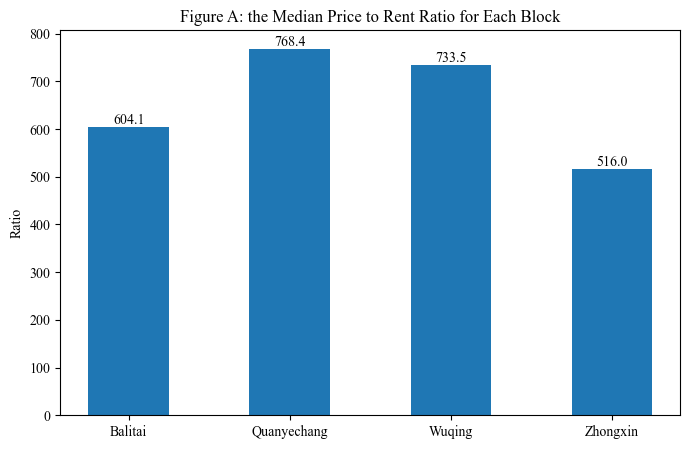

In [21]:
# 画图（图A）
plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(8, 5))
bars = plt.bar(block_ratios.keys(), block_ratios.values(), width=0.5) 

# 在每个柱子上显示具体值
for bar, value in zip(bars, block_ratios.values()):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'{value:.1f}', ha='center', va='bottom')

plt.title('Figure A: the Median Price to Rent Ratio for Each Block')
plt.ylabel('Ratio')
plt.show()

# 三、建模

## 1、模型1和模型2

In [22]:
# Model 1: price/m2i = β0 + β1*m2i + β2*locationi + ϵi
# 创建虚拟变量
block_dummies = pd.get_dummies(esf_combined_df['block'], prefix='block')
X1 = pd.concat([esf_combined_df[['面积(㎡)']], block_dummies], axis=1)
X1 = sm.add_constant(X1)

# 转换为numpy数组
X1_array = X1.astype(float).values
y1_array = esf_combined_df['单价(元/㎡)'].astype(float).values

# 拟合模型
model1 = sm.OLS(y1_array, X1_array).fit()
print("Model 1 R-squared:", model1.rsquared)

# 用房价模型预测租房数据的房价
# 为租房数据创建相同的特征
block_dummies_zu = pd.get_dummies(zu_combined_df['block'], prefix='block')
X1_zu = pd.concat([zu_combined_df[['面积(㎡)']], block_dummies_zu], axis=1)
X1_zu = sm.add_constant(X1_zu)

# 转换为numpy数组
X1_zu_array = X1_zu.astype(float).values

# 预测租房数据的房价并添加到租房数据中
zu_combined_df['预测房价_1'] = model1.predict(X1_zu_array)

Model 1 R-squared: 0.6340473985383592


In [23]:
zu_combined_df.head()

,面积(㎡),租金(元/月),block,单价(元/㎡),预测房价_1
0,400,29000,Balitai,72.500000,30395.935087
1,80,3600,Balitai,45.000000,29330.551165
2,49,1700,Balitai,34.693878,29227.342097
3,380,30000,Balitai,78.947368,30329.348592
4,38,2000,Balitai,52.631579,29190.719525


In [24]:
# Model 2: rent/m2i = β0 + β1*m2i + β2*locationi + ϵi
# 创建虚拟变量
block_dummies2 = pd.get_dummies(zu_combined_df['block'], prefix='block')
X2 = pd.concat([zu_combined_df[['面积(㎡)']], block_dummies2], axis=1)
X2 = sm.add_constant(X2)

# 转换为numpy数组
X2_array = X2.astype(float).values
y2_array = zu_combined_df['单价(元/㎡)'].astype(float).values

# 拟合模型
model2 = sm.OLS(y2_array, X2_array).fit()
print("Model 2 R-squared:", model2.rsquared)

# 用租金模型预测二手房数据的租金
# 为二手房数据创建相同的特征
block_dummies_esf = pd.get_dummies(esf_combined_df['block'], prefix='block')
X2_esf = pd.concat([esf_combined_df[['面积(㎡)']], block_dummies_esf], axis=1)
X2_esf = sm.add_constant(X2_esf)

# 转换为numpy数组
X2_esf_array = X2_esf.astype(float).values

# 预测二手房数据的租金并添加到二手房数据中
esf_combined_df['预测租金_1'] = model2.predict(X2_esf_array)

Model 2 R-squared: 0.5836862829523739


In [25]:
esf_combined_df.head()

,面积(㎡),总价(万),单价(元/㎡),block,预测租金_1
0,145.67,430.0,29518,Balitai,45.730407
1,57.15,119.0,20822,Balitai,46.464700
2,50.42,130.0,25783,Balitai,46.520527
3,141.61,515.0,36367,Balitai,45.764086
4,103.66,406.0,39166,Balitai,46.078889


### 计算每个Block的房价租金比中位数

In [26]:
# 计算各区块模型预测的房价租金比中位数
block_ratios_model = {}

print("各区块模型预测的房价租金比中位数:")

# 在二手房数据中计算每个样本的预测房价租金比（实际房价 / 预测租金）
esf_combined_df['预测房价租金比_1'] = esf_combined_df['单价(元/㎡)'] / esf_combined_df['预测租金_1']

# 在租房数据中计算每个样本的预测房价租金比（预测房价 / 实际租金）
zu_combined_df['预测房价租金比_1'] = zu_combined_df['预测房价_1'] / zu_combined_df['单价(元/㎡)']

for block in esf_combined_df['block'].unique():
    # 获取该区块所有样本的预测房价租金比中位数
    block_ratio_median = esf_combined_df[esf_combined_df['block'] == block]['预测房价租金比_1'].median()
    
    block_ratios_model[block] = block_ratio_median
    print(f"{block}: {block_ratio_median:.2f}")

各区块模型预测的房价租金比中位数:
Balitai: 564.62
Quanyechang: 694.02
Wuqing: 718.53
Zhongxin: 516.90


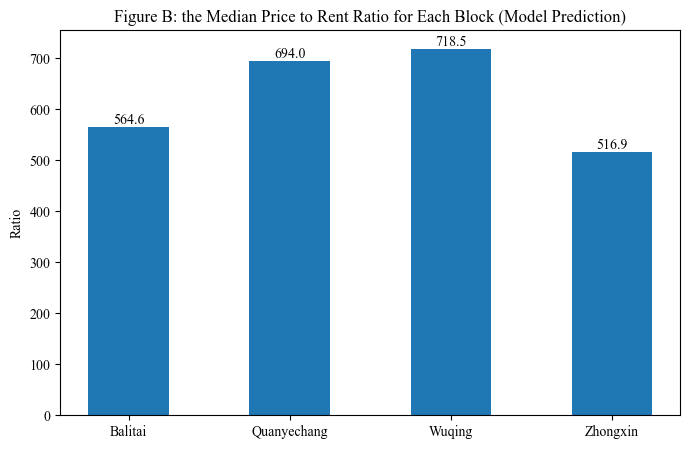

In [27]:
# 画图（图B）
plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(8, 5))
bars = plt.bar(block_ratios_model.keys(), block_ratios_model.values(), width=0.5) 

# 在每个柱子上显示具体值
for bar, value in zip(bars, block_ratios_model.values()):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'{value:.1f}', ha='center', va='bottom')

plt.title('Figure B: the Median Price to Rent Ratio for Each Block (Model Prediction)')
plt.ylabel('Ratio')
plt.show()

## 2、模型1+和模型2+

In [28]:
# Model 1+
# 创建特征：面积平方和交互项
X1_plus = esf_combined_df[['面积(㎡)', 'block']].copy()
X1_plus['面积平方'] = X1_plus['面积(㎡)'] ** 2

# 创建虚拟变量
block_dummies = pd.get_dummies(X1_plus['block'], prefix='block')
X1_plus = pd.concat([X1_plus[['面积(㎡)', '面积平方']], block_dummies], axis=1)

# 添加交互项（面积×每个区块）
for block_col in block_dummies.columns:
    X1_plus[f'{block_col}_交互'] = X1_plus['面积(㎡)'] * X1_plus[block_col]

# 添加常数项
X1_plus = sm.add_constant(X1_plus)

# 转换为numpy数组
X1_plus_array = X1_plus.astype(float).values
y1_array = esf_combined_df['单价(元/㎡)'].astype(float).values

# 拟合增强模型
model1_plus = sm.OLS(y1_array, X1_plus_array).fit()
print("Model 1+ R-squared:", model1_plus.rsquared)

# 用增强房价模型预测租房数据的房价
# 为租房数据创建相同的增强特征
X1_plus_zu = zu_combined_df[['面积(㎡)', 'block']].copy()
X1_plus_zu['面积平方'] = X1_plus_zu['面积(㎡)'] ** 2

# 创建虚拟变量
block_dummies_zu = pd.get_dummies(X1_plus_zu['block'], prefix='block')
X1_plus_zu = pd.concat([X1_plus_zu[['面积(㎡)', '面积平方']], block_dummies_zu], axis=1)

# 添加交互项（面积×每个区块）
for block_col in block_dummies_zu.columns:
    X1_plus_zu[f'{block_col}_交互'] = X1_plus_zu['面积(㎡)'] * X1_plus_zu[block_col]

# 添加常数项
X1_plus_zu = sm.add_constant(X1_plus_zu)

# 转换为numpy数组
X1_plus_zu_array = X1_plus_zu.astype(float).values

# 预测租房数据的房价并添加到租房数据中
zu_combined_df['预测房价_2'] = model1_plus.predict(X1_plus_zu_array)

Model 1+ R-squared: 0.6961211667039231


In [29]:
zu_combined_df.head()

,面积(㎡),租金(元/月),block,单价(元/㎡),预测房价_1,预测房价租金比_1,预测房价_2
0,400,29000,Balitai,72.500000,30395.935087,419.254277,82843.614647
1,80,3600,Balitai,45.000000,29330.551165,651.790026,24858.172220
2,49,1700,Balitai,34.693878,29227.342097,842.435155,22204.022196
3,380,30000,Balitai,78.947368,30329.348592,384.171749,77585.562702
4,38,2000,Balitai,52.631579,29190.719525,554.623671,21388.042085


In [30]:
# Model 2+
# 创建特征：面积平方和交互项
X2_plus = zu_combined_df[['面积(㎡)', 'block']].copy()
X2_plus['面积平方'] = X2_plus['面积(㎡)'] ** 2

# 创建虚拟变量
block_dummies2 = pd.get_dummies(X2_plus['block'], prefix='block')
X2_plus = pd.concat([X2_plus[['面积(㎡)', '面积平方']], block_dummies2], axis=1)

# 添加交互项（面积×每个区块）
for block_col in block_dummies2.columns:
    X2_plus[f'{block_col}_交互'] = X2_plus['面积(㎡)'] * X2_plus[block_col]

# 添加常数项
X2_plus = sm.add_constant(X2_plus)

# 转换为numpy数组
X2_plus_array = X2_plus.astype(float).values
y2_array = zu_combined_df['单价(元/㎡)'].astype(float).values

# 拟合增强模型
model2_plus = sm.OLS(y2_array, X2_plus_array).fit()
print("Model 2+ R-squared:", model2_plus.rsquared)

# 用增强租金模型预测二手房数据的租金
# 为二手房数据创建相同的增强特征
X2_plus_esf = esf_combined_df[['面积(㎡)', 'block']].copy()
X2_plus_esf['面积平方'] = X2_plus_esf['面积(㎡)'] ** 2

# 创建虚拟变量
block_dummies_esf = pd.get_dummies(X2_plus_esf['block'], prefix='block')
X2_plus_esf = pd.concat([X2_plus_esf[['面积(㎡)', '面积平方']], block_dummies_esf], axis=1)

# 添加交互项（面积×每个区块）
for block_col in block_dummies_esf.columns:
    X2_plus_esf[f'{block_col}_交互'] = X2_plus_esf['面积(㎡)'] * X2_plus_esf[block_col]

# 添加常数项
X2_plus_esf = sm.add_constant(X2_plus_esf)

# 转换为numpy数组
X2_plus_esf_array = X2_plus_esf.astype(float).values

# 预测二手房数据的租金并添加到二手房数据中
esf_combined_df['预测租金_2'] = model2_plus.predict(X2_plus_esf_array)

Model 2+ R-squared: 0.5978636488302957


In [31]:
esf_combined_df.head()

,面积(㎡),总价(万),单价(元/㎡),block,预测租金_1,预测房价租金比_1,预测租金_2
0,145.67,430.0,29518,Balitai,45.730407,645.478617,41.287533
1,57.15,119.0,20822,Balitai,46.464700,448.125135,45.840337
2,50.42,130.0,25783,Balitai,46.520527,554.228460,46.547354
3,141.61,515.0,36367,Balitai,45.764086,794.662438,41.303305
4,103.66,406.0,39166,Balitai,46.078889,849.977083,42.348252


#### Model1+和Model2+的R^2值均高于Model1和Model2。
#### 原因：非线性特征（平方项）捕捉了房价/租金与面积的曲线关系，交互项捕捉了不同Block中面积对价格影响的差异；并且，更多特征让模型能更好地拟合数据的复杂模式

### 计算每个Block的房价租金比中位数

In [32]:
# 计算各区块增强模型预测的房价租金比中位数
block_ratios_model2 = {}

print("各区块增强模型预测的房价租金比中位数:")

# 在二手房数据中计算每个样本的增强模型预测房价租金比（实际房价 / 增强模型预测租金）
esf_combined_df['预测房价租金比_2'] = esf_combined_df['单价(元/㎡)'] / esf_combined_df['预测租金_2']

# 在租房数据中计算每个样本的增强模型预测房价租金比（增强模型预测房价 / 实际租金）
zu_combined_df['预测房价租金比_2'] = zu_combined_df['预测房价_2'] / zu_combined_df['单价(元/㎡)']

for block in esf_combined_df['block'].unique():
    # 获取该区块所有样本的增强模型预测房价租金比中位数
    block_ratio_median2 = esf_combined_df[esf_combined_df['block'] == block]['预测房价租金比_2'].median()
    
    block_ratios_model2[block] = block_ratio_median2
    print(f"{block}: {block_ratio_median2:.2f}")

各区块增强模型预测的房价租金比中位数:
Balitai: 594.71
Quanyechang: 698.58
Wuqing: 758.27
Zhongxin: 516.40


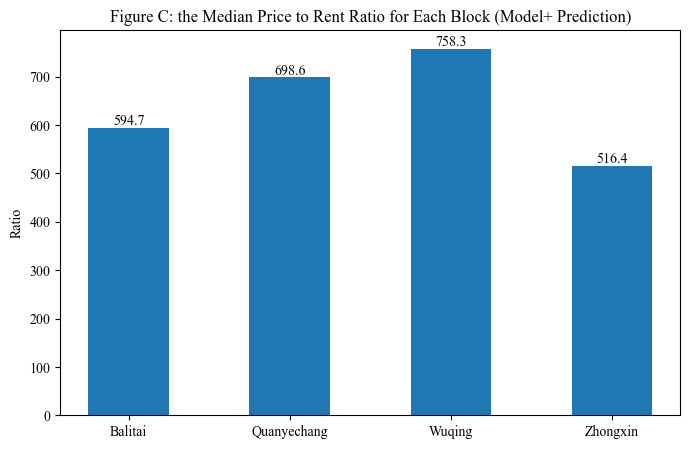

In [33]:
# 画图（图C）
plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(8, 5))
bars = plt.bar(block_ratios_model2.keys(), block_ratios_model2.values(), width=0.5) 

# 在每个柱子上显示具体值
for bar, value in zip(bars, block_ratios_model2.values()):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'{value:.1f}', ha='center', va='bottom')

plt.title('Figure C: the Median Price to Rent Ratio for Each Block (Model+ Prediction)')
plt.ylabel('Ratio')
plt.show()

#### 结论：我认为图C中基于模型1+和2+预测的价格租金比更可信。因为图B和图C使用了交叉预测的方法，相比于图A只使用实际观测值，图B和图C的有效样本量实际上是翻倍的，每个区块都有来自两个数据集的信息，提供了更全面的市场视角。除此之外，图C还包含了非线性特征和交互项，R^2更高，能更好地捕捉市场的复杂模式。